In [10]:
from astropy import units as u
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('bmh')
from astropy.coordinates import SkyCoord,Angle

In [64]:
def parallatic_angle(HA,dec,lat):
    HA=Angle(HA*u.hour).rad
    dec = dec.to(u.rad).value
    lat = lat.to(u.rad).value
    q = np.arctan2(np.sin(HA),(np.cos(dec)*np.tan(lat)-np.sin(dec)*np.cos(HA)))
    return q*u.rad



/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


(-12.0, 12.0)

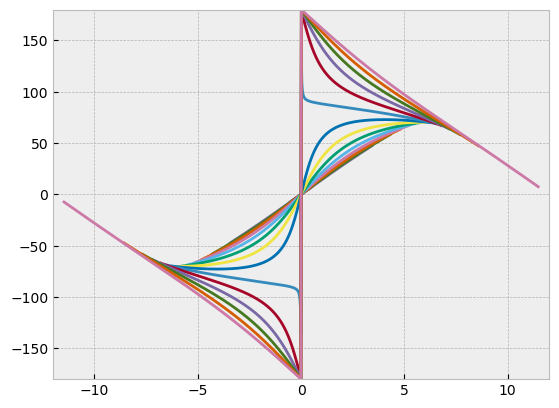

In [120]:
hours=np.linspace(-12,12,1000)
for i in [-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80]*u.deg:
    lat=19.826*u.deg
    LHA_below_horizon=np.rad2deg(np.arccos(-np.tan(lat.to(u.rad).value)*np.tan(i.to(u.rad).value)))/15 #Local Hour Angle the target goes below the Horizon
    new_hours=[]
    for hour in hours.copy():

        if abs(hour) < LHA_below_horizon:
            new_hours.append(hour)
            
    q=parallatic_angle(new_hours,i,lat)
    plt.plot(new_hours,(q.to(u.deg)))

    
plt.ylim(-180,180)
plt.xlim(-12,12)

TypeError: parallactic_angle() missing 1 required positional argument: 'target'